# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model_KM = KMeans(n_clusters=8).fit(X)
labels = model_KM.labels_
print("The Silhouette score is : {}".format(silhouette_score(X,labels)))

The Silhouette score is : 0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [15]:

model_KM = KMeans(n_clusters=5).fit(X)
labels = model_KM.labels_
print("The Silhouette score is : {}".format(silhouette_score(X,labels)))

The Silhouette score is : 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [16]:

model_KM = KMeans(n_clusters=3).fit(X)
labels = model_KM.labels_
print("The Silhouette score is : {}".format(silhouette_score(X,labels)))

The Silhouette score is : 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

Text(0.5, 1.0, 'Calinski_harabasz')

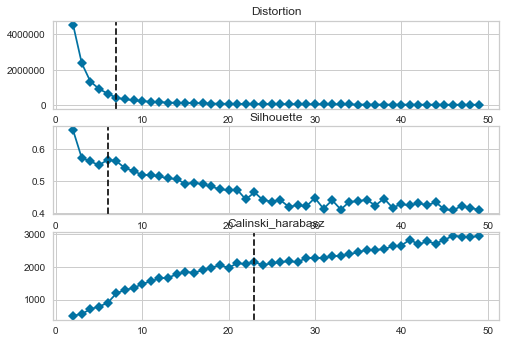

In [54]:
from yellowbrick.cluster import KElbowVisualizer
model_KM = KMeans()
fig, ax = plt.subplots(3,1)
k_s = (2,50)


vis1 = KElbowVisualizer(model_KM,ax[0],k=k_s,metric="distortion", timings=False)
vis1.fit(X)


vis2 = KElbowVisualizer(model_KM,ax[1],k=k_s,metric="silhouette", timings=False)
vis2.fit(X)
 

vis3 = KElbowVisualizer(model_KM,ax[2],k=k_s,metric="calinski_harabasz", timings=False)
vis3.fit(X)



ax[0].set_title("Distortion")
ax[1].set_title("Silhouette")
ax[2].set_title("Calinski_harabasz")

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA76D25C08>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

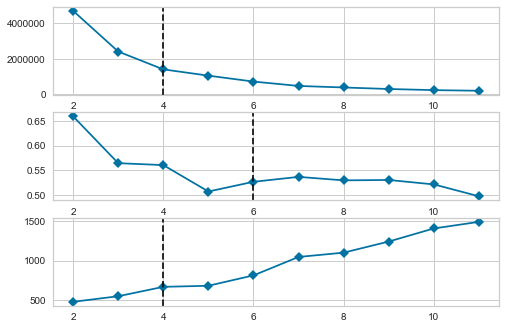

In [48]:
from sklearn.cluster import AgglomerativeClustering
fig, ax = plt.subplots(3,1)
KElbowVisualizer(AgglomerativeClustering(), )
vis1 = KElbowVisualizer(AgglomerativeClustering(),ax[0],k=k_s,metric="distortion", timings=False)
vis1.fit(X)

vis2 = KElbowVisualizer(AgglomerativeClustering(),ax[1],k=k_s,metric="silhouette", timings=False)
vis2.fit(X)

vis3 = KElbowVisualizer(AgglomerativeClustering(),ax[2],k=k_s,metric="calinski_harabasz", timings=False)
vis3.fit(X)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [58]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,3


In [61]:
model_KM = KMeans(n_clusters=4).fit(X)
labels = model_KM.labels_
X["labels"] = pd.DataFrame(labels)

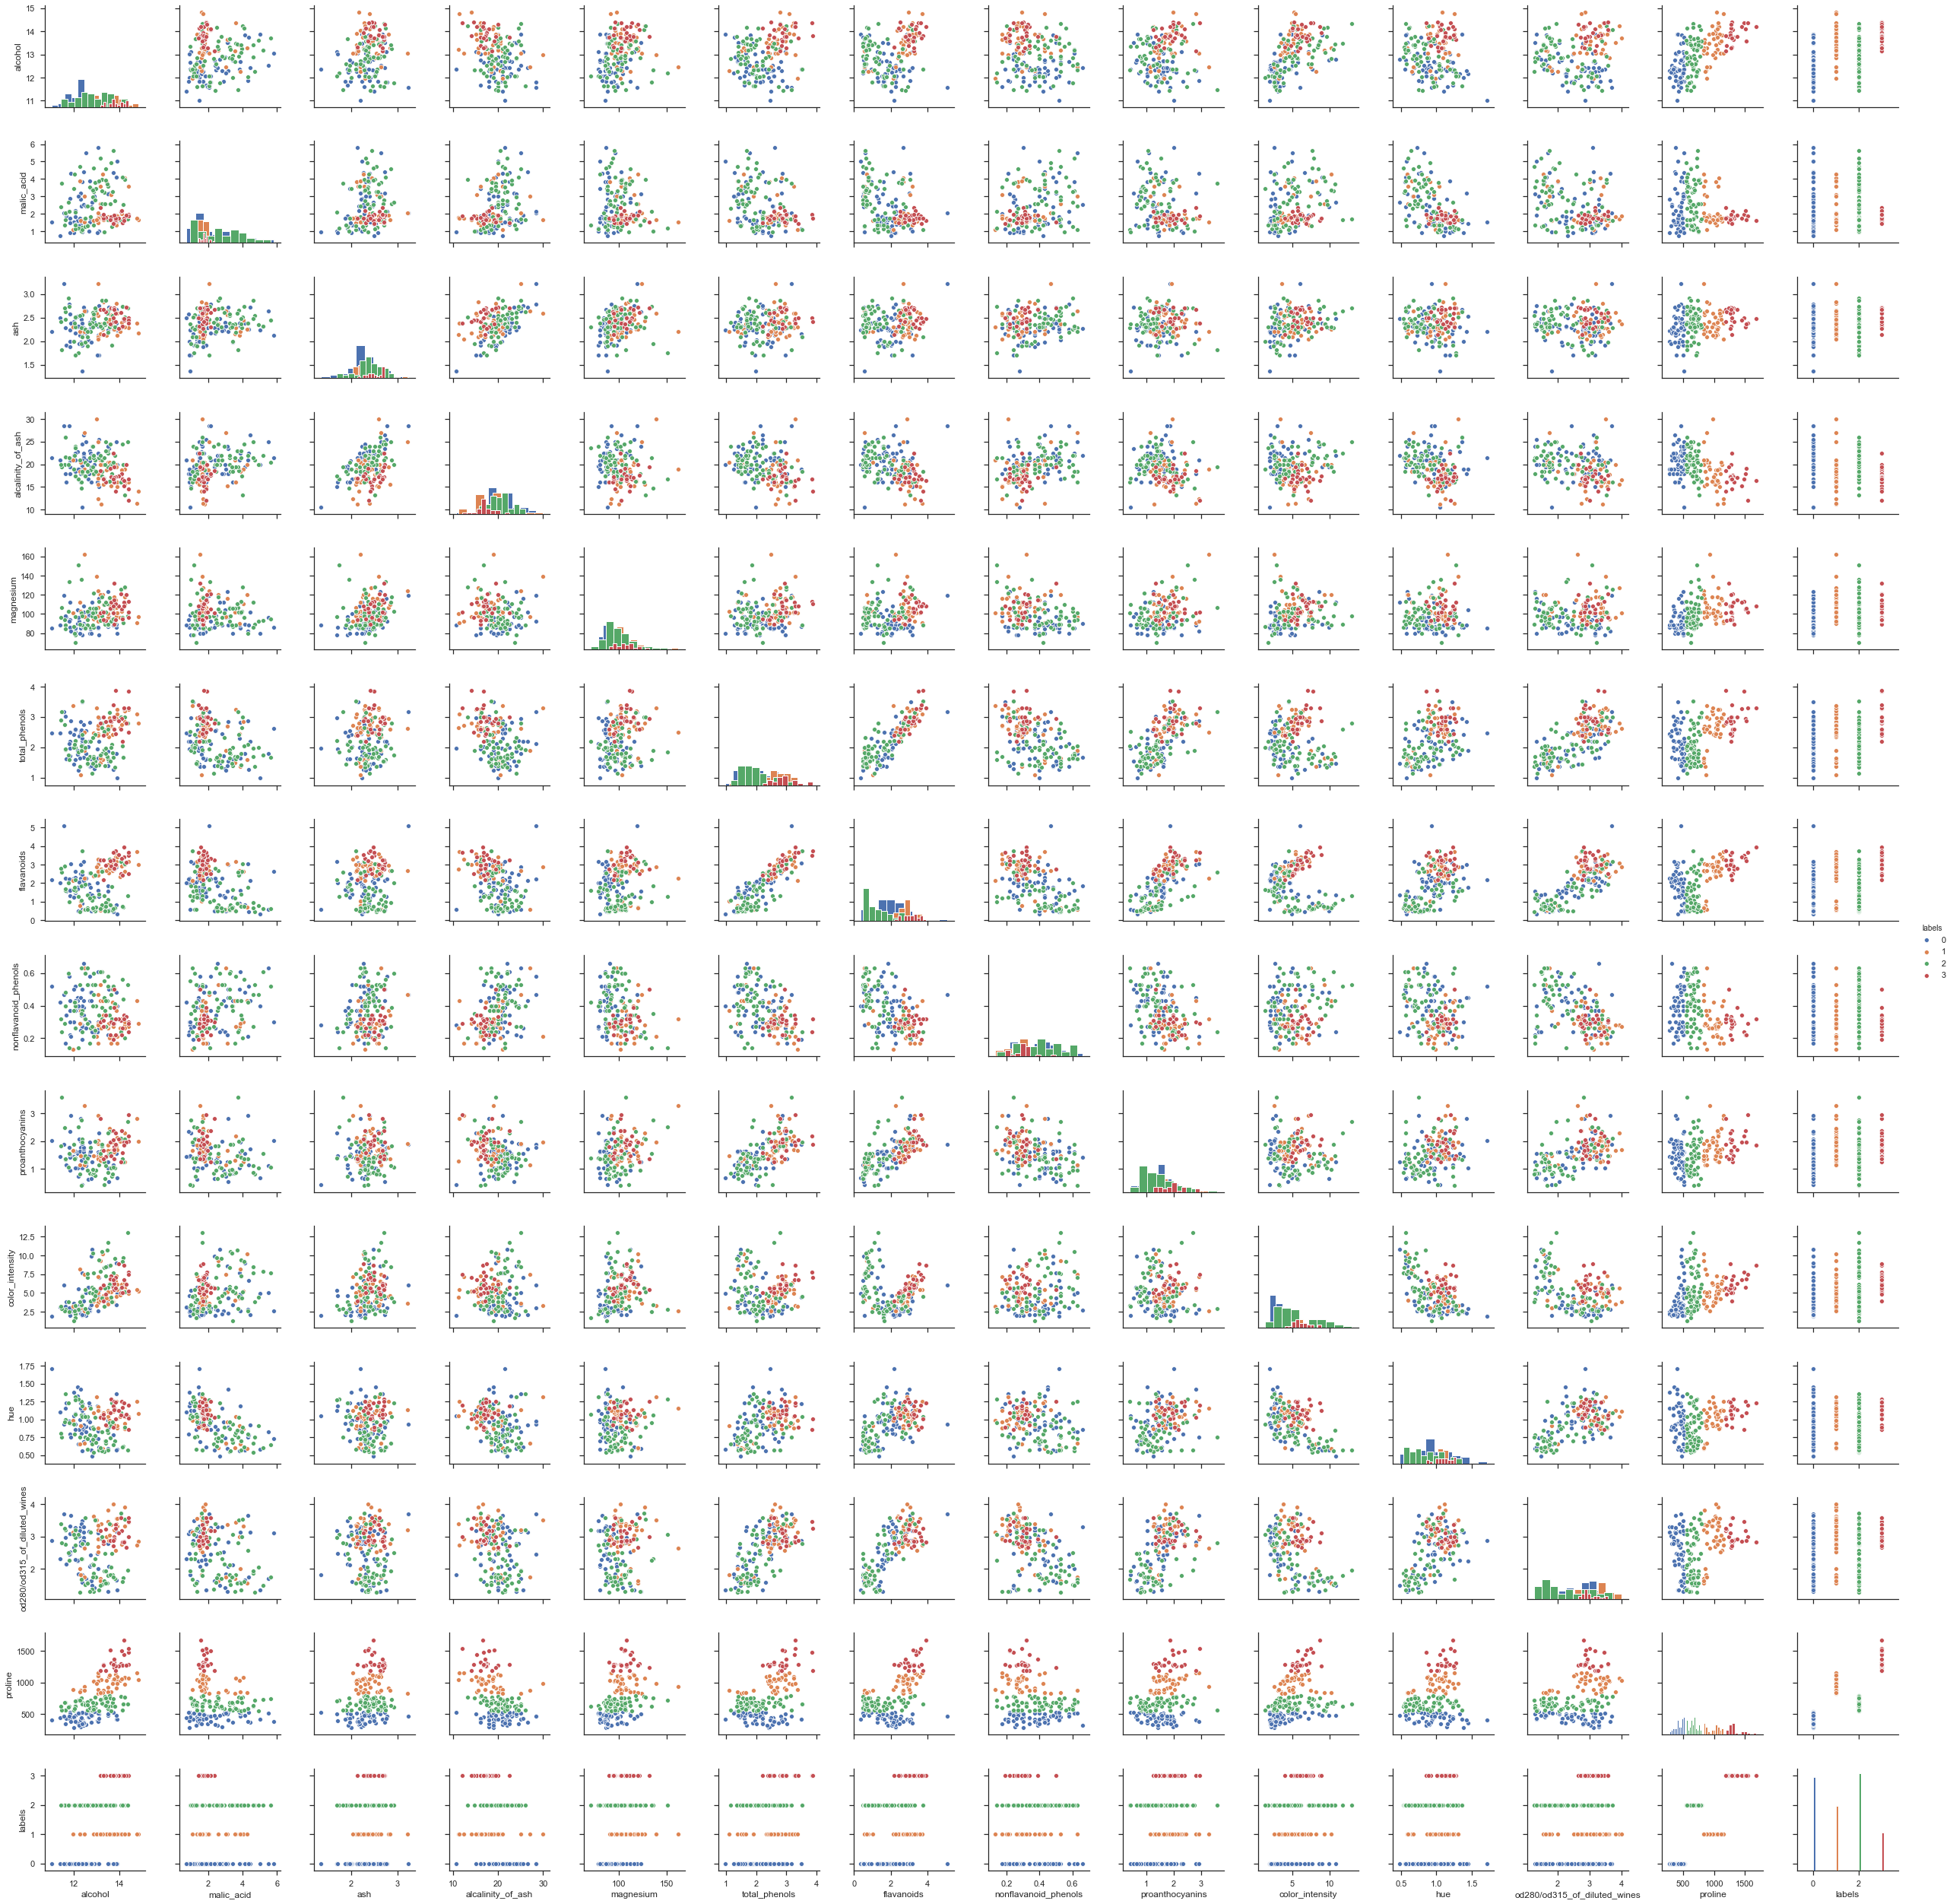

In [66]:
sns.set(style = "ticks")
#sns.pairplot(X[["alcohol", "ash", "hue", "labels"]],hue = "labels",diag_kind='hist')
sns.pairplot(X,hue = "labels",diag_kind='hist')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

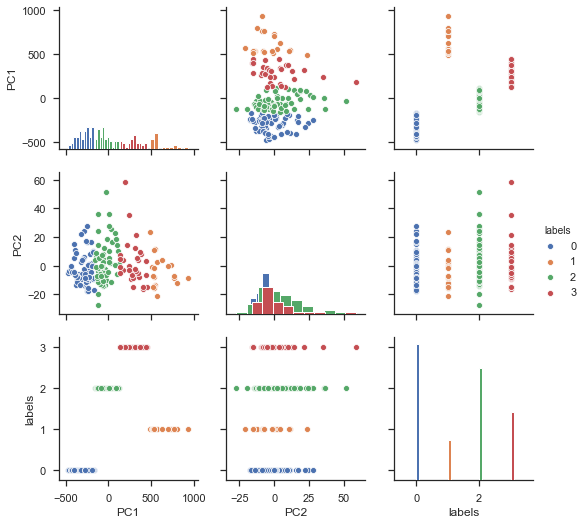

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

model_KM = KMeans(n_clusters=4).fit(principalDf)
labels = model_KM.labels_
principalDf["labels"] = pd.DataFrame(labels)
sns.pairplot(principalDf,hue = "labels",diag_kind='hist')

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 17.680632
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.702747
[t-SNE] KL divergence after 1000 iterations: 0.110597
             0          1
0    -7.166764   8.065880
1    -6.882803   7.819082
2    -8.204910  10.043050
3   -10.024982  12.271854
4    -1.696961   1.235114
..         ...        ...
173  -1.354040   1.456840
174  -1.647663   1.784089
175  -3.411653   3.756491
176  -3.334795   4.021734
177   3.934605  -6.172104

[178 rows x 2 columns]


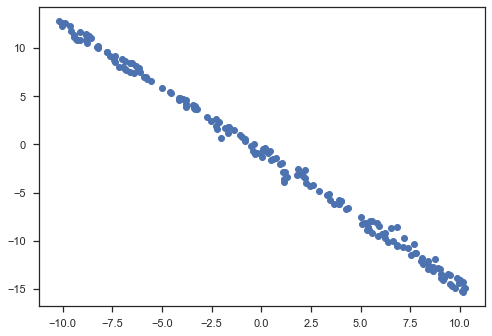

In [80]:
from sklearn.manifold import TSNE

info_tsne = TSNE(n_components=2, verbose=True).fit_transform(X)

print(pd.DataFrame(info_tsne))
plt.scatter(pd.DataFrame(info_tsne)[0], pd.DataFrame(info_tsne)[1])